In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
#Read the data set
air=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#Column Rename
air= air.rename(columns={'ID#':'ID', 'Award?':'Award'})
air.columns

Index(['ID', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [4]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
air.describe()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Data preprocessing

In [6]:
air1=air.drop(['ID','Award'],axis=1)
air1.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968


# Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
new_features=scaler.fit_transform(air1.iloc[:,:])
new_features

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        0.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [51]:
from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)

# Hierarchical clustering

In [52]:
from scipy.cluster.hierarchy import linkage
from pandas.core.common import random_state
import scipy.cluster.hierarchy as sch

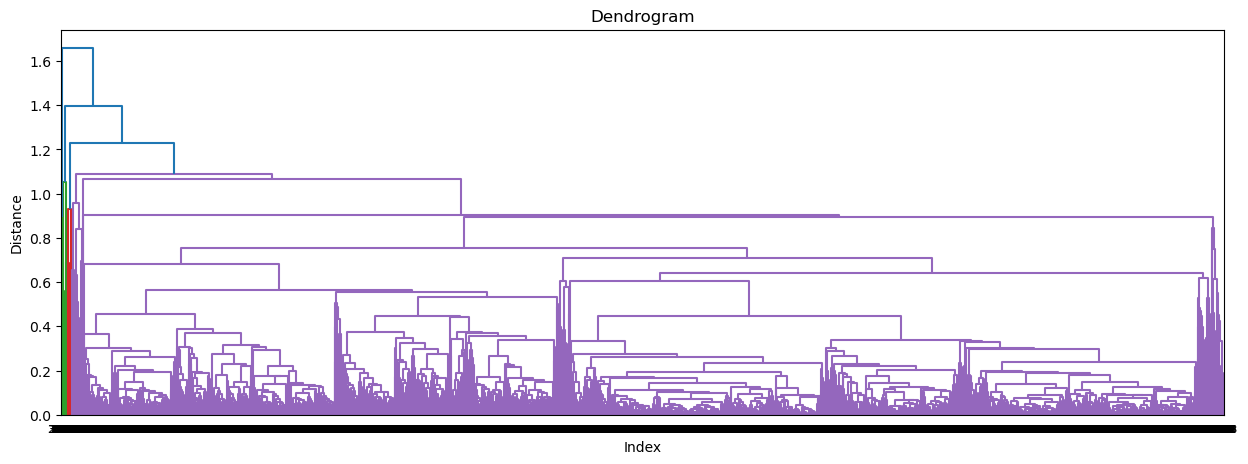

In [75]:
Z = linkage(new_features, method='average', metric= 'euclidean')
plt.figure(figsize=(15,5))
plt.title("Dendrogram")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(Z, leaf_rotation=0, leaf_font_size=8)
plt.show()

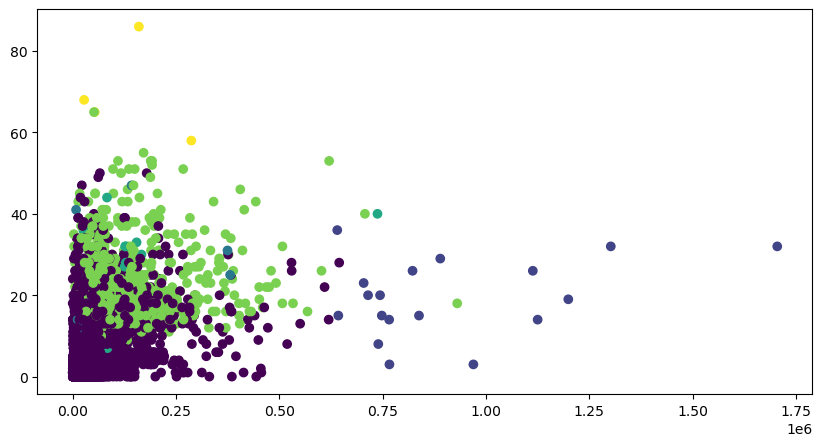

In [65]:
cluster=AgglomerativeClustering(n_clusters=6,affinity='euclidean',linkage='complete')
label=cluster.fit_predict(new_features)
plt.figure(figsize=(10,5))
plt.scatter(air1["Balance"],air1["Bonus_trans"],c=label)

# silhouette score

In [24]:
from sklearn.metrics import silhouette_score

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.metrics import silhouette_score

list1= [2,3,4,5,6,7,8,9]  # always start number from 2.

for n_clusters in list1:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0,n_jobs=-1)
    cluster_labels1 = clusterer1.fit_predict(pca_std_df)
    sil_score1= silhouette_score(pca_std_df, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

For n_clusters = 2 The average silhouette_score is : 0.3639788167896175
For n_clusters = 3 The average silhouette_score is : 0.33580068936862695
For n_clusters = 4 The average silhouette_score is : 0.33811895596476305
For n_clusters = 5 The average silhouette_score is : 0.354575129869185
For n_clusters = 6 The average silhouette_score is : 0.3662869252330996
For n_clusters = 7 The average silhouette_score is : 0.2681253435179658
For n_clusters = 8 The average silhouette_score is : 0.2733658800277117
For n_clusters = 9 The average silhouette_score is : 0.29020780384748357


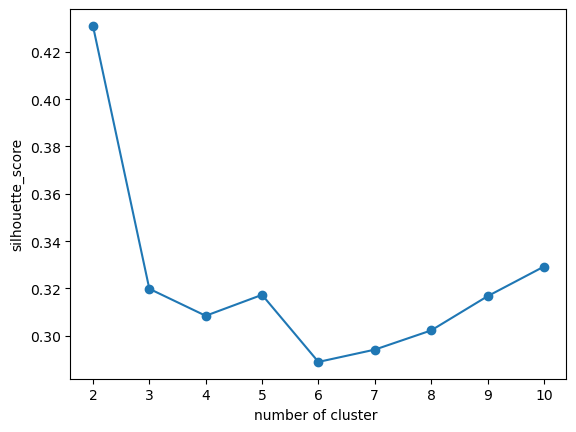

In [68]:
nc=range(2,11)
sil=[]
for i in nc:
    cluster=AgglomerativeClustering(n_clusters=i)
    label=cluster.fit_predict(new_features)
    sil.append(silhouette_score(new_features,label)    )
    
plt.scatter(nc,sil)   
plt.plot(nc,sil)  
plt.xticks(nc)
plt.xlabel("number of cluster ")
plt.ylabel("silhouette_score")
plt.show()

# Kmean clustering

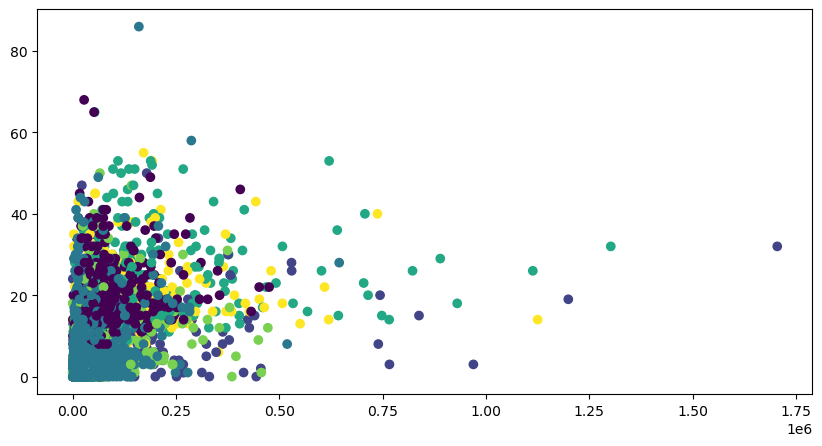

In [69]:
cluster=KMeans(n_clusters=6)
label=cluster.fit_predict(new_features)
plt.figure(figsize=(10,5))
plt.scatter(air1["Balance"],air1["Bonus_trans"],c=label)

# Elbow method

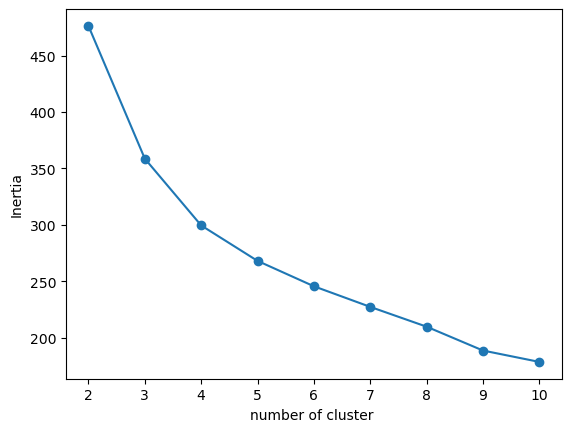

In [70]:
nc=range(2,11)
inertia=[]
for i in nc:
    cluster=KMeans(n_clusters=i)
    label=cluster.fit_predict(new_features)
    inertia.append(cluster.inertia_    )
    
plt.scatter(nc,inertia)   
plt.plot(nc,inertia)  
plt.xticks(nc)
plt.xlabel("number of cluster ")
plt.ylabel("Inertia")
plt.show()

# DBSCAN Clustering

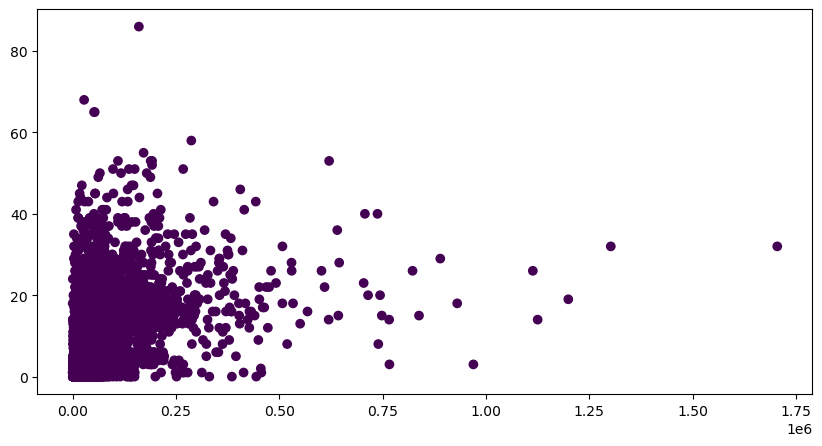

In [71]:
cluster=DBSCAN(eps=2,min_samples=7)
label=cluster.fit_predict(new_features)
plt.figure(figsize=(10,5))
plt.scatter(air1["Balance"],air1["Bonus_trans"],c=label)

In [72]:
label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
air1['Cluster']=cluster.labels_
air1.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Cluster
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
